In [68]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
d=LabelEncoder()

In [ ]:
import nltk

In [ ]:
nltk.download("punkt")

In [69]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()


In [70]:
nltk.download("stopwords")
from nltk.corpus import stopwords
a=set(stopwords.words("English"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [71]:
import string
b=string.punctuation

In [72]:
s=pd.read_csv("spam.csv",encoding="latin1")

In [73]:
s.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [74]:
s.sample(6)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5532,ham,happened here while you were adventuring,NaN,NaN,NaN
2079,ham,I can take you at like noon,NaN,NaN,NaN
1613,ham,Thnx dude. u guys out 2nite?,NaN,NaN,NaN
437,ham,How long does applebees fucking take,NaN,NaN,NaN
874,ham,Talk With Yourself Atleast Once In A Day...!!!...,NaN,NaN,NaN
3775,ham,Ok lor. Msg me b4 u call.,NaN,NaN,NaN


In [75]:
s.shape

(5572, 5)

In [76]:
s.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [77]:
s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


# Data Cleaning

In [78]:
s.isnull()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,False,False,True,True,True
1,False,False,True,True,True
2,False,False,True,True,True
3,False,False,True,True,True
4,False,False,True,True,True
...,...,...,...,...,...
5567,False,False,True,True,True
5568,False,False,True,True,True
5569,False,False,True,True,True
5570,False,False,True,True,True


In [79]:
s.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [80]:
s.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)

In [81]:
s.isnull().sum()

v1    0
v2    0
dtype: int64

In [82]:
s.rename(columns={"v1":"Target","v2":"Text"},inplace=True)

In [83]:
s.sample()

,Target,Text
3446,ham,Sitting ard nothing to do lor. U leh busy w work?


In [84]:
mapping={"ham":"0","spam":"1"}
s["Target"]
s["Target"]=s["Target"].map(mapping)

In [85]:
s.sample(5)

,Target,Text
4439,0,I've got it down to a tea. not sure which flavour
5162,0,Just send a text. We'll skype later.
2289,1,Had your mobile 11mths ? Update for FREE to Or...
4711,0,Thats cool princess! I will cover your face in...
2590,0,Lol I have to take it. member how I said my au...


In [86]:
s["Target"].dtype

dtype('O')

In [87]:
s["Target"]=d.fit_transform(s["Target"])

In [88]:
s.sample()

,Target,Text
2676,0,* Am on a train back from northampton so i'm a...


In [89]:
s.isnull().sum()

Target    0
Text      0
dtype: int64

In [90]:
s.duplicated().sum()

403

In [91]:
s=s.drop_duplicates(keep="first")

In [92]:
s.sample()

,Target,Text
4064,0,Dont kick coco when he's down


In [93]:
s.duplicated().sum()

0

# EDA

In [94]:
s["Target"].value_counts()

0    4516
1     653
Name: Target, dtype: int64

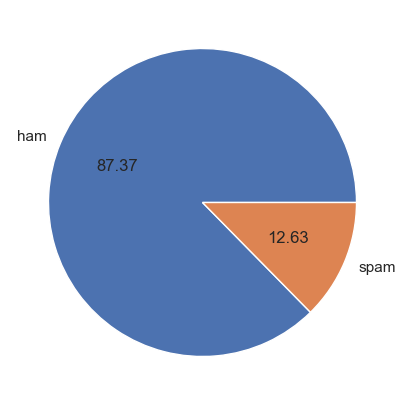

In [95]:
plt.pie(s["Target"].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [98]:
s["num_char"]=s["Text"].apply(len)

In [99]:
s.head()

,Target,Text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [100]:
s['Words']=s["Text"].apply(lambda x:nltk.word_tokenize(x))

In [101]:
s.head()

,Target,Text,num_char,Words
0,0,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point, ,, crazy, .., Avail..."
1,0,Ok lar... Joking wif u oni...,29,"[Ok, lar, ..., Joking, wif, u, oni, ...]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F..."
3,0,U dun say so early hor... U c already then say...,49,"[U, dun, say, so, early, hor, ..., U, c, alrea..."
4,0,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, do, n't, think, he, goes, to, usf, ,,..."


In [102]:
s["num_words"]=s["Text"].apply(lambda x:len(nltk.word_tokenize(x)))

In [103]:
s.head()

,Target,Text,num_char,Words,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point, ,, crazy, .., Avail...",24
1,0,Ok lar... Joking wif u oni...,29,"[Ok, lar, ..., Joking, wif, u, oni, ...]",8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",37
3,0,U dun say so early hor... U c already then say...,49,"[U, dun, say, so, early, hor, ..., U, c, alrea...",13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, do, n't, think, he, goes, to, usf, ,,...",15


In [104]:
s["Text"].apply(lambda x:(nltk.sent_tokenize(x)))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: Text, Length: 5169, dtype: object

In [105]:
s["num_sentences"]=s["Text"].apply(lambda x:len(nltk.sent_tokenize(x)))

In [106]:
s.head()

,Target,Text,num_char,Words,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point, ,, crazy, .., Avail...",24,2
1,0,Ok lar... Joking wif u oni...,29,"[Ok, lar, ..., Joking, wif, u, oni, ...]",8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",37,2
3,0,U dun say so early hor... U c already then say...,49,"[U, dun, say, so, early, hor, ..., U, c, alrea...",13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, do, n't, think, he, goes, to, usf, ,,...",15,1


In [107]:
s[["num_char","num_words","num_sentences"]].describe()

,num_char,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [108]:
u=s[s["Target"]==0][["num_char","num_words","num_sentences"]].describe()

In [109]:
v=s[s["Target"]==1][["num_char","num_words","num_sentences"]].describe()

In [110]:
s[s["Target"]==0]

,Target,Text,num_char,Words,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point, ,, crazy, .., Avail...",24,2
1,0,Ok lar... Joking wif u oni...,29,"[Ok, lar, ..., Joking, wif, u, oni, ...]",8,2
3,0,U dun say so early hor... U c already then say...,49,"[U, dun, say, so, early, hor, ..., U, c, alrea...",13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, do, n't, think, he, goes, to, usf, ,,...",15,1
6,0,Even my brother is not like to speak with me. ...,77,"[Even, my, brother, is, not, like, to, speak, ...",18,2
...,...,...,...,...,...,...
5565,0,Huh y lei...,12,"[Huh, y, lei, ...]",4,1
5568,0,Will Ì_ b going to esplanade fr home?,37,"[Will, Ì_, b, going, to, esplanade, fr, home, ?]",9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,"[Pity, ,, *, was, in, mood, for, that, ., So, ...",15,2
5570,0,The guy did some bitching but I acted like i'd...,125,"[The, guy, did, some, bitching, but, I, acted,...",27,1


<Axes: xlabel='num_char', ylabel='Count'>

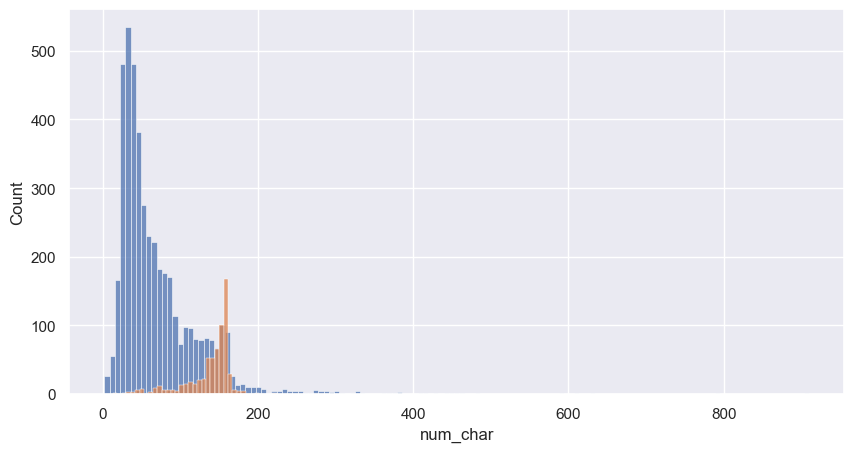

In [111]:
sns.set(rc={'figure.figsize':(10,5)})
sns.histplot(x=s[s["Target"]==0]["num_char"])  ##ham
sns.histplot(x=s[s["Target"]==1]["num_char"])   ##spam

<Axes: xlabel='num_words', ylabel='Count'>

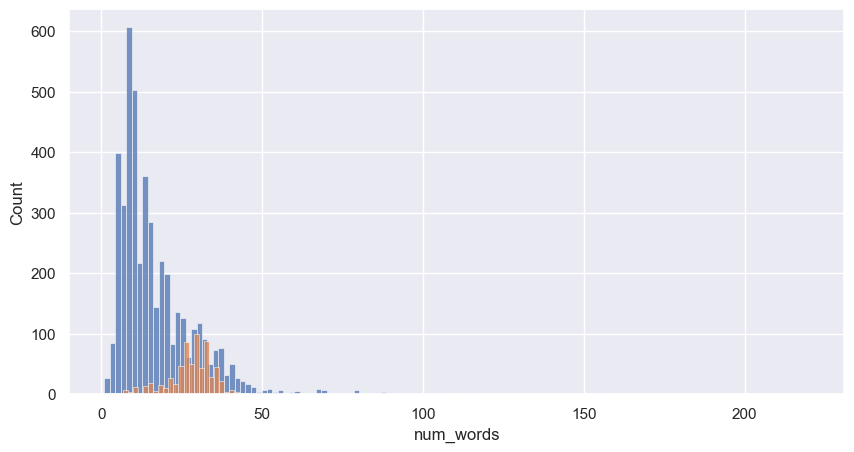

In [112]:
sns.histplot(x=s[s["Target"]==0]["num_words"])  ##ham
sns.histplot(x=s[s["Target"]==1]["num_words"])   ##spam

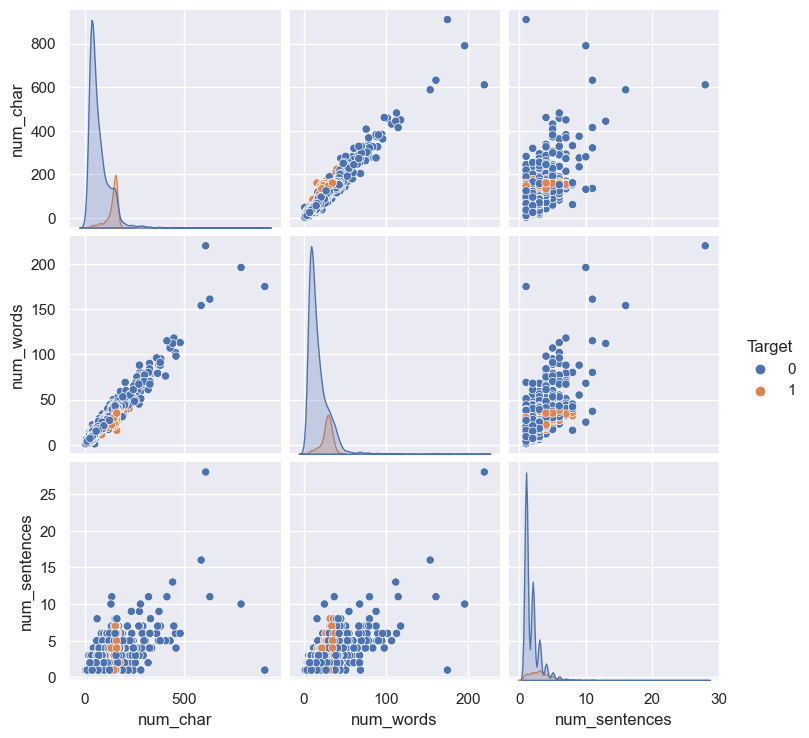

In [113]:
sns.pairplot(hue="Target",data=s)

In [114]:
s.corr()

C:\Users\DELL\AppData\Local\Temp\ipykernel_5976\1738201638.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  s.corr()


,Target,num_char,num_words,num_sentences
Target,1.000000,0.384717,0.262984,0.284901
num_char,0.384717,1.000000,0.965770,0.638143
num_words,0.262984,0.965770,1.000000,0.684541
num_sentences,0.284901,0.638143,0.684541,1.000000


C:\Users\DELL\AppData\Local\Temp\ipykernel_5976\2044704208.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=s.corr(),annot=True)


<Axes: >

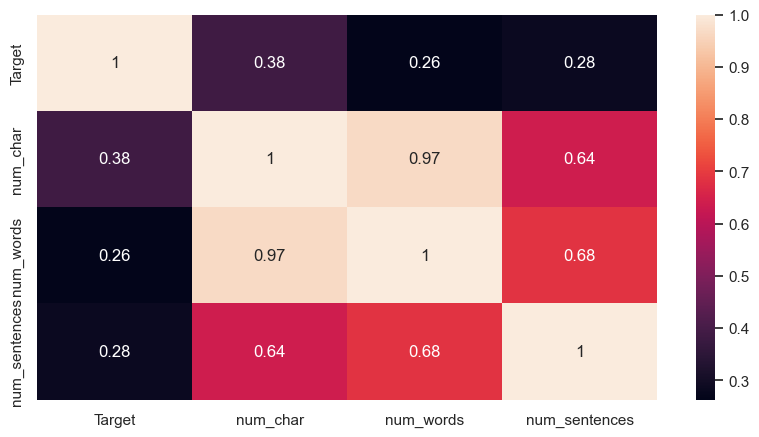

In [115]:
sns.heatmap(data=s.corr(),annot=True)

## Conclusion of eda

* The data is imbalance. (ham data is way more)
* The leng of  Spam msgs are more 
* Target (msg is spam or ham) is positively correlated to no. of char 38%

# Text preprocessing using nltk 

In [131]:
def Trans(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for v in text:
        if v.isalnum() and v not in a:
            t=ps.stem(v)
            y.append(t)
    return " ".join(y)

In [132]:
s["PrePro"]=s["Text"].apply(Trans)

In [133]:
s.head()

,Target,Text,num_char,Words,num_words,num_sentences,PrePro
0,0,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point, ,, crazy, .., Avail...",24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,"[Ok, lar, ..., Joking, wif, u, oni, ...]",8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,"[U, dun, say, so, early, hor, ..., U, c, alrea...",13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, do, n't, think, he, goes, to, usf, ,,...",15,1,nah think goe usf live around though


# Most common words using word Cloud

In [136]:
!pip install wordcloud

     -------------------------------------- 300.0/300.0 kB 3.7 MB/s eta 0:00:00


In [137]:
from wordcloud import WordCloud
wc=WordCloud(width=670,height=800,min_font_size=12,background_color="White")

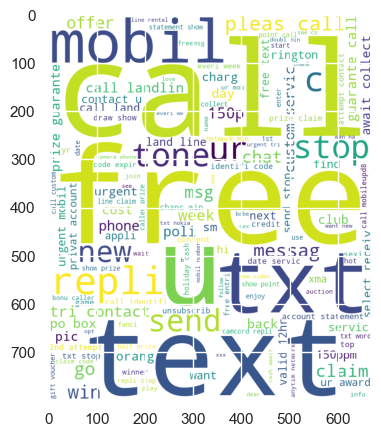

In [140]:
Spam=wc.generate(s[s["Target"]==1]["PrePro"].str.cat(sep=" "))
plt.imshow(Spam)

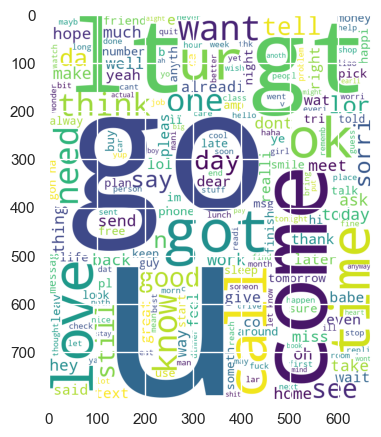

In [141]:
Ham=wc.generate(s[s["Target"]==0]["PrePro"].str.cat(sep=" "))
plt.imshow(Ham)

# Top 30 words in spam

In [151]:
from collections import Counter

In [ ]:
spam=s[s["Target"]==1]["PrePro"].tolist()

In [162]:
wordS=[]
for msg in spam:
    for word in msg.split():
        wordS.append(word)
c=Counter(wordS).most_common(30)
SW=pd.DataFrame(c)
SW

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


In [ ]:
sns.barplot(data=SW,x=SW[0],y=SW[1])
plt.xticks(rotation="vertical")
plt.show()

# Top 30 words in ham

In [ ]:
Ham=s[s["Target"]==0]["PrePro"].tolist()

In [163]:
wordH=[]
for msg in Ham:
    for word in msg.split():
        wordS.append(word)
d=Counter(wordS).most_common(30)
HW=pd.DataFrame(d)
HW

,0,1
0,u,1002
1,call,553
2,2,439
3,go,436
4,get,423
5,ur,316
6,gt,288
7,lt,287
8,come,280
9,know,255


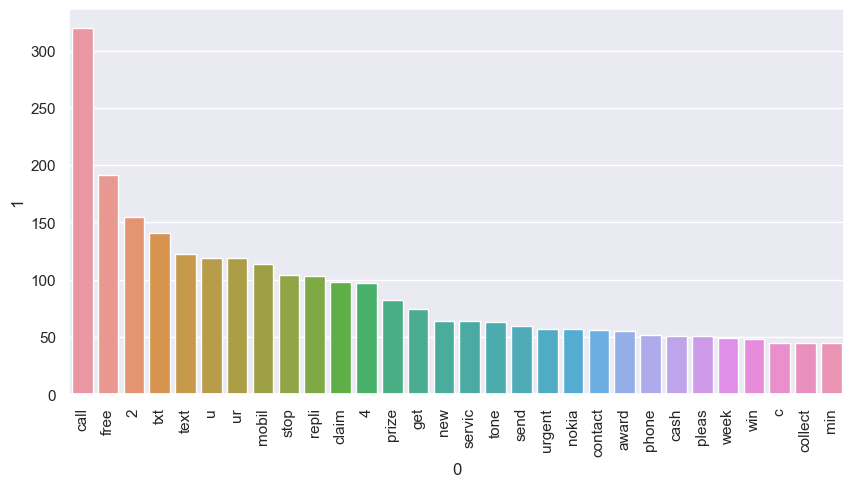

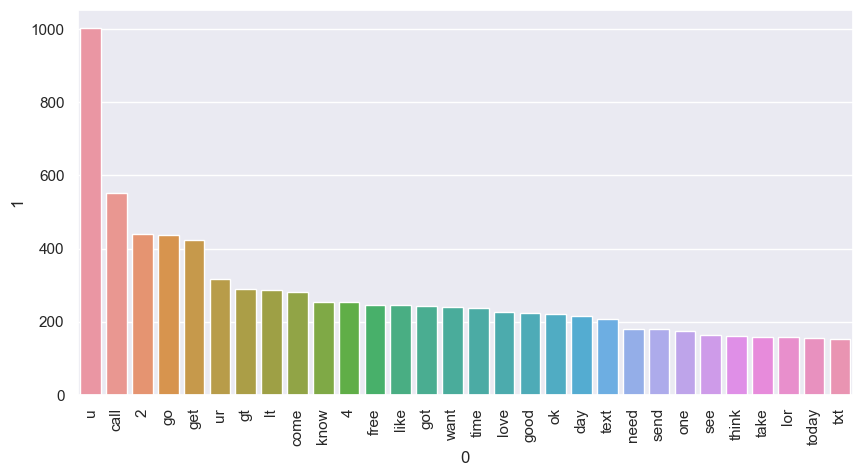

In [166]:
sns.barplot(data=HW,x=HW[0],y=HW[1])
plt.xticks(rotation="vertical")
plt.show()

# Model Building

In [242]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [267]:
cv=CountVectorizer()
Tfidf=TfidfVectorizer(max_features=3000)

In [268]:
#PrePro to vectors that will be our x variable using CountVectorizer
X=cv.fit_transform(s["PrePro"])

In [269]:
type(X)

scipy.sparse._csr.csr_matrix

In [270]:
X=X.toarray()

In [271]:
from sklearn.preprocessing import MinMaxScaler
m=MinMaxScaler()
X=m.fit_transform(X)
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [272]:
#target variable y
Y=s["Target"].values

In [273]:
Y

array([0, 0, 1, ..., 0, 0, 0])

In [274]:
from sklearn.model_selection import train_test_split

In [275]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [276]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [277]:
gnb=GaussianNB()
mnb= MultinomialNB()
bnb=BernoulliNB()

In [278]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [279]:
gnb.fit(X_train,Y_train)
y_pred= gnb.predict(X_test)
ac=accuracy_score(Y_test,y_pred)
cm=confusion_matrix(Y_test,y_pred)
pc=precision_score(Y_test,y_pred)
print("ac={}\ncm={}\npc={}".format(ac,cm,pc))

ac=0.8781431334622823
cm=[[791 105]
 [ 21 117]]
pc=0.527027027027027


In [280]:
mnb.fit(X_train,Y_train)
y_pred2= mnb.predict(X_test)
ac=accuracy_score(Y_test,y_pred2)
cm=confusion_matrix(Y_test,y_pred2)
pc=precision_score(Y_test,y_pred2)
print("ac={}\ncm={}\npc={}".format(ac,cm,pc))

ac=0.9729206963249516
cm=[[881  15]
 [ 13 125]]
pc=0.8928571428571429


In [281]:
bnb.fit(X_train,Y_train)
y_pred3= bnb.predict(X_test)
ac=accuracy_score(Y_test,y_pred3)
cm=confusion_matrix(Y_test,y_pred3)
pc=precision_score(Y_test,y_pred3)
print("ac={}\ncm={}\npc={}".format(ac,cm,pc))                                             

ac=0.9700193423597679
cm=[[893   3]
 [ 28 110]]
pc=0.9734513274336283


In [294]:
#PrePro to vectors that will be our x variable using TfidfVectorizer
X2=Tfidf.fit_transform(s["PrePro"]).toarray()

In [295]:
type(X2)

numpy.ndarray

In [296]:
X2_train,X2_test,Y2_train,Y2_test = train_test_split(X2,Y,test_size=0.2,random_state=2)

In [297]:
gnb.fit(X2_train,Y2_train)
Y2_pred= gnb.predict(X2_test)
ac1=accuracy_score(Y2_test,Y2_pred)
cm1=confusion_matrix(Y2_test,Y2_pred)
pc1=precision_score(Y2_test,Y2_pred)
print("ac={}\ncm={}\npc={}".format(ac1,cm1,pc1))

ac=0.8694390715667312
cm=[[788 108]
 [ 27 111]]
pc=0.5068493150684932


In [298]:
mnb.fit(X2_train,Y2_train)
Y3_pred= mnb.predict(X2_test)
ac2=accuracy_score(Y2_test,Y3_pred)
cm2=confusion_matrix(Y2_test,Y3_pred)
pc2=precision_score(Y2_test,Y3_pred)
print("ac={}\ncm={}\npc={}".format(ac2,cm2,pc2))

ac=0.9709864603481625
cm=[[896   0]
 [ 30 108]]
pc=1.0


In [292]:
bnb.fit(X2_train,Y2_train)
y_pred4= bnb.predict(X2_test)
ac3=accuracy_score(Y2_test,y_pred4)
cm3=confusion_matrix(Y2_test,y_pred4)
pc3=precision_score(Y2_test,y_pred4)
print("ac={}\ncm={}\npc={}".format(ac3,cm3,pc3)) 

ac=0.9835589941972921
cm=[[895   1]
 [ 16 122]]
pc=0.991869918699187


### As precision got increased by 12% in Multinomial naive bayes therefore we will used mnb We chose tfidf and mnb